# Transformando Texto em Estruturas de Dados

- Computadores só "entendem" números. Por isso 

## Bag of Words em ação

@author: Aman Kedia

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Sentenças

In [2]:
sentences = ["We are reading about Natural Language Processing Here",
            "Natural Language Processing making computers comprehend language data",
            "The field of Natural Language Processing is evolving everyday"]

In [3]:
corpus = pd.Series(sentences)
corpus

0    We are reading about Natural Language Processi...
1    Natural Language Processing making computers c...
2    The field of Natural Language Processing is ev...
dtype: object

### Processamento de dados

#### Passo 1: Cleaning

In [4]:
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)
    
    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process
    
    Output : Returns the cleaned text corpus
    
    '''
    cleaned_corpus = pd.Series(dtype=str)
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = p1.lower()
                qs.append(p1)
            else : qs.append(word)
        cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(qs)))
    return cleaned_corpus

In [5]:
texto = pd.Series(['Srs., vamos começar representando um documento por meio da frequência das suas palavras!'])
r = text_clean(texto, [])
r

0    srs   vamos come ar representando um documento...
dtype: object

In [6]:
list(r)

['srs   vamos come ar representando um documento por meio da frequ ncia das suas palavras ']

#### Passo 2: Stopwords Removal

In [7]:
def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Passo 3: Lemmatization

In [9]:
def lemmatize(corpus):
    """Lemmatize verbs

    Args:
        corpus (2d iterable): tokens to lemmatize, 

    Returns:
        [type]: [description]
    """
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [10]:
entrada = [corpus[0].split()]
saida = lemmatize(entrada)
print(entrada)
saida

[['We', 'are', 'reading', 'about', 'Natural', 'Language', 'Processing', 'Here']]


[['We', 'be', 'read', 'about', 'Natural', 'Language', 'Processing', 'Here']]

#### Passo 4: Stem

In [11]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [12]:
# usando o stem padrão (PorterStemmer)
entrada = [corpus[0].split()]
saida = stem(entrada)
print(entrada)
saida

[['We', 'are', 'reading', 'about', 'Natural', 'Language', 'Processing', 'Here']]


[['we', 'are', 'read', 'about', 'natur', 'languag', 'process', 'here']]

In [13]:
# usando o stem snowball
entrada = [corpus[0].split()]
saida = stem(entrada, 'snowball')
print(entrada)
saida

[['We', 'are', 'reading', 'about', 'Natural', 'Language', 'Processing', 'Here']]


[['we', 'are', 'read', 'about', 'natur', 'languag', 'process', 'here']]

#### Pipeline

In [14]:
def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)
    
    Input : 
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should 
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer
    
    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together
    
    Output : Returns the processed text corpus
    
    '''
    
    if cleaning == True:
        corpus = text_clean(corpus, keep_list)
    
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]
    
    if lemmatization == True:
        corpus = lemmatize(corpus)
        
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
    
    corpus = [' '.join(x) for x in corpus]        

    return corpus

In [15]:
common_dot_words = ['U.S.', 'Mr.', 'Mrs.', 'D.C.']

In [16]:
# Preprocessing with Lemmatization here
preprocessed_corpus = preprocess(
    corpus, 
    keep_list = common_dot_words,
    stemming = False, 
    stem_type = None,
    lemmatization = True, 
    remove_stopwords = True)
print("ENTRADA:")
display(list(corpus))
print("\nSAIDA:")    
preprocessed_corpus

ENTRADA:


['We are reading about Natural Language Processing Here',
 'Natural Language Processing making computers comprehend language data',
 'The field of Natural Language Processing is evolving everyday']


SAIDA:


['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

### Construindo o vocabulário

#### Original

In [17]:
set_of_words = set()
for sentence in preprocessed_corpus:
    for word in sentence.split():
        set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['comprehend', 'process', 'computers', 'everyday', 'language', 'natural', 'field', 'make', 'data', 'evolve', 'read']


#### Otimizado

In [18]:
from functools import reduce
set(reduce(lambda a, b: a+b, map(str.split, preprocessed_corpus)))

{'comprehend',
 'computers',
 'data',
 'everyday',
 'evolve',
 'field',
 'language',
 'make',
 'natural',
 'process',
 'read'}

In [19]:
# passo a passo:
r = list(map(str.split, preprocessed_corpus))
print('1')
display(r)
r = reduce(lambda a, b: a+b, r)
print('2')
display(r)
r = set(r)
print('3')
display(r)


1


[['read', 'natural', 'language', 'process'],
 ['natural',
  'language',
  'process',
  'make',
  'computers',
  'comprehend',
  'language',
  'data'],
 ['field', 'natural', 'language', 'process', 'evolve', 'everyday']]

2


['read',
 'natural',
 'language',
 'process',
 'natural',
 'language',
 'process',
 'make',
 'computers',
 'comprehend',
 'language',
 'data',
 'field',
 'natural',
 'language',
 'process',
 'evolve',
 'everyday']

3


{'comprehend',
 'computers',
 'data',
 'everyday',
 'evolve',
 'field',
 'language',
 'make',
 'natural',
 'process',
 'read'}

### Indexando cada palavra

#### Original

In [20]:
position = {}
for i, token in enumerate(vocab):
    position[token] = i
print(position)

{'comprehend': 0, 'process': 1, 'computers': 2, 'everyday': 3, 'language': 4, 'natural': 5, 'field': 6, 'make': 7, 'data': 8, 'evolve': 9, 'read': 10}


#### Otimizado

In [21]:
dict(zip(vocab, range(len(vocab))))

{'comprehend': 0,
 'process': 1,
 'computers': 2,
 'everyday': 3,
 'language': 4,
 'natural': 5,
 'field': 6,
 'make': 7,
 'data': 8,
 'evolve': 9,
 'read': 10}

### Criação da matriz Bag of Words

O formato da matriz é (num de sentenças x tamanho do vocabulário),

In [1]:
display(preprocessed_corpus)
display(vocab)
bow_matrix = np.zeros((len(preprocessed_corpus), len(vocab)))
bow_matrix

NameError: name 'preprocessed_corpus' is not defined

In [23]:
for i, preprocessed_sentence in enumerate(preprocessed_corpus):
    for token in preprocessed_sentence.split():   
        bow_matrix[i][position[token]] = bow_matrix[i][position[token]] + 1
bow_matrix

array([[0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 2., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.]])

In [24]:
# renderizando em um DataFrame para melhor visualização
pd.DataFrame(bow_matrix, columns=vocab, index=['frase 1', 'frase 2', 'frase 3']).T

,frase 1,frase 2,frase 3
comprehend,0.0,1.0,0.0
process,1.0,1.0,1.0
computers,0.0,1.0,0.0
everyday,0.0,0.0,1.0
language,1.0,2.0,1.0
natural,1.0,1.0,1.0
field,0.0,0.0,1.0
make,0.0,1.0,0.0
data,0.0,1.0,0.0
evolve,0.0,0.0,1.0


### Inferência

Tomando como exemplo a palavra *language* na *bow_matrix*, os valores são 1, 2 e 1 respectivamente.

*language* ocorre **uma, duas e uma vez** nas sentenças 1, 2 e 3 respectivamente.

### Exercício

Experimente incluir bigramas e trigramas no modelo BoW.

### Considerações

**- Pró**
  - Simplicidade
  - Computacionalmente rápido*

- **Contra**
  1. Não leva em consideração a **semântica** ou **significados** associados a um token ou frases em um documento.
  2. Não captura *features* obervando a vizinhança de uma token <sub>(que poderia sugerir o contexto em que uma palavra)</sub>.
  3. Igoram tokens ou frases que ocorrem muito raramente <sub>(que podem ser muito importantes na representação dos documentos)</sub>.
  4. Pode ficar **extremamente grande em termos de vocabulário**, dependendo do tamanho do corpus, o que pode causar uma deterioração no desempenho computacional.

## CountVectorizer para o modelo Bag of Words

**Documentação**: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [25]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Construindo um corpus de sentenças

In [26]:
sentences = ["We are reading about Natural Language Processing Here",
            "Natural Language Processing making computers comprehend language data",
            "The field of Natural Language Processing is evolving everyday"]

In [27]:
corpus = pd.Series(sentences)
corpus

0    We are reading about Natural Language Processi...
1    Natural Language Processing making computers c...
2    The field of Natural Language Processing is ev...
dtype: object

### Pipeline de pré-processamento

In [28]:
# Pré-processando com lematização
preprocessed_corpus = preprocess(corpus, keep_list = [], stemming = False, stem_type = None,
                                lemmatization = True, remove_stopwords = True)


print("ENTRADA:")
display(list(corpus))
print("\nSAIDA:")    
preprocessed_corpus

ENTRADA:


['We are reading about Natural Language Processing Here',
 'Natural Language Processing making computers comprehend language data',
 'The field of Natural Language Processing is evolving everyday']


SAIDA:


['read natural language process',
 'natural language process make computers comprehend language data',
 'field natural language process evolve everyday']

### CountVectorizer

#### Fit e Transform

In [29]:
# from sklearn.feature_extraction.text import CountVectorizer
# treina o preparador criando o vocabulário
vectorizer = CountVectorizer()
vectorizer.fit(preprocessed_corpus)
vectorizer.vocabulary_

{'read': 10,
 'natural': 8,
 'language': 6,
 'process': 9,
 'make': 7,
 'computers': 1,
 'comprehend': 0,
 'data': 2,
 'field': 5,
 'evolve': 4,
 'everyday': 3}

In [30]:
bow_matrix = vectorizer.transform(preprocessed_corpus)
bow_matrix

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

#### fit_transform

In [31]:
def show_bow_matrix(bow_matrix, vectorizer):
    df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names()).T
    df.columns = [f'qtd{c}' for c in df.columns]
    print('BoW Matrix Shape: ', df.shape)
    df['Total'] = df.astype(bool).sum(axis=1)
    df.index.name = 'n-grams'
    return df.sort_values(['Total', 'n-grams'], ascending=False).reset_index()
    

In [32]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
bow_matrix

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

#### Observando quais features foram obtidas e a matriz correspondente do Bag of Words

In [33]:
show_bow_matrix(bow_matrix, vectorizer)

BoW Matrix Shape:  (11, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural,1,1,1,3
2,language,1,2,1,3
3,read,1,0,0,1
4,make,0,1,0,1
5,field,0,0,1,1
6,evolve,0,0,1,1
7,everyday,0,0,1,1
8,data,0,1,0,1
9,computers,0,1,0,1


<font size=6>A matriz é a mesma obtida depois de todo o trabalho duro do notebook anterior.</font>

#### Vamos ver como bigramas e trigramas podem ser incluídos

In [34]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(preprocessed_corpus)

In [35]:
show_bow_matrix(bow_matrix_ngram, vectorizer_ngram_range)

BoW Matrix Shape:  (32, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural language process,1,1,1,3
2,natural language,1,1,1,3
3,natural,1,1,1,3
4,language process,1,1,1,3
5,language,1,2,1,3
6,read natural language,1,0,0,1
7,read natural,1,0,0,1
8,read,1,0,0,1
9,process make computers,0,1,0,1


#### Inferência

A frase *natural language process*, no índice 23, aparece ao menos uma vez em cada sentença.


### Parâmetro Max Features

Uma grande dimensionalidade do vocabulário não converte em um bom modelo, podendo gerar *overfitting*.

Para isso é necessário dispor de recursos para limitá-lo.

O `CountVectorizer` possui um parâmetro chamado `max_features`, que limita o vocabulário para ser menor ou igual ao seu valor, ordenado pela frequência entre as sentenças.

In [36]:
CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 6).fit(preprocessed_corpus).vocabulary_
vectorizer_max_features = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 8)
bow_matrix_max_features = vectorizer_max_features.fit_transform(preprocessed_corpus)
show_bow_matrix(bow_matrix_max_features, vectorizer_max_features)

BoW Matrix Shape:  (8, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural language process,1,1,1,3
2,natural language,1,1,1,3
3,natural,1,1,1,3
4,language process,1,1,1,3
5,language,1,2,1,3
6,read,1,0,0,1
7,process make computers,0,1,0,1


#### Inferência

Limita o vocabulário aos 6 n-gramas mais frequentes

### Limites usando os parâmetros `max_df` e `min_df`

Num texto é possível que haja **palavras ou frases que aparecem muitas vezes** e **não possuem qualquer padrão**.

Há também palavras que apacerem raramente e apenas poluem o vocabulário.

Uma maneira de resolver esses problemas é **determinando uma quantidade máxima e/ou mínima de vezes em que uma palavra ou frase pode aparecer nas sentenças para ser considerado parte do vocabulário**.

O preparador `CountVectorizer` posssi os parâmetros:

- `max_df`: determina a quantidade máxima
- `min_df` determina a quantidade mínima

In [37]:
vectorizer_maxmin_df = CountVectorizer(analyzer='word', ngram_range=(1,3), max_df=3, min_df=2)
bow_matrix_maxmin_df = vectorizer_maxmin_df.fit_transform(preprocessed_corpus)

In [38]:
show_bow_matrix(bow_matrix_maxmin_df, vectorizer_maxmin_df)

BoW Matrix Shape:  (6, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural language process,1,1,1,3
2,natural language,1,1,1,3
3,natural,1,1,1,3
4,language process,1,1,1,3
5,language,1,2,1,3


### Inferência

Somente as n-gramas presentes de 1 a 3 sentenças estão presentes no vocabulário

Mostrando o preparador `CountVectorizer` sem nenhuma restrição, a fim de comparar:

In [39]:
vectorizer = CountVectorizer(ngram_range=(1,3))
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
show_bow_matrix(bow_matrix, vectorizer)

BoW Matrix Shape:  (32, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural language process,1,1,1,3
2,natural language,1,1,1,3
3,natural,1,1,1,3
4,language process,1,1,1,3
5,language,1,2,1,3
6,read natural language,1,0,0,1
7,read natural,1,0,0,1
8,read,1,0,0,1
9,process make computers,0,1,0,1


Texto para testar o `max_df` e o `min_df`:

In [40]:
text = [
"Um dois dois tres tres tres quatro quatro quatro quatro cinco cinco cinco cinco cinco seis seis seis seis seis seis",
"dois dois dois dois dois tres tres tres tres quatro quatro quatro cinco cinco seis",
"tres quatro quatro cinco cinco cinco seis seis seis seis",
"quatro quatro quatro cinco cinco seis",
"cinco seis seis",
"seis" 
]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(text)
df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names()).T.reset_index().rename(columns={'index': 'n-grams'})
df['Total'] = df.iloc[:, 1:].astype(bool).sum(axis=1)
df.sort_values(['Total', 'n-grams'], ascending=False).head(50)

,n-grams,0,1,2,3,4,5,Total
3,seis,6,1,4,1,2,1,6
0,cinco,5,2,3,2,1,0,5
2,quatro,4,3,2,3,0,0,4
4,tres,3,4,1,0,0,0,3
1,dois,2,5,0,0,0,0,2
5,um,1,0,0,0,0,0,1


In [41]:
vectorizer = CountVectorizer(max_df=5, min_df=2)
bow_matrix = vectorizer.fit_transform(text)
df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names()).T.reset_index().rename(columns={'index': 'n-grams'})
df['Total'] = df.iloc[:, 1:].astype(bool).sum(axis=1)
df.sort_values(['Total', 'n-grams'], ascending=False).head(50)

,n-grams,0,1,2,3,4,5,Total
0,cinco,5,2,3,2,1,0,5
2,quatro,4,3,2,3,0,0,4
3,tres,3,4,1,0,0,0,3
1,dois,2,5,0,0,0,0,2


### Considerações


**- Pró**
  - Simplicidade
  - Computacionalmente rápido*

- **Contra**
  1. Não leva em consideração a **semântica** ou **significados** associados a um token ou frases em um documento.
  2. Não captura *features* obervando a vizinhança de uma token <sub>(que poderia sugerir o contexto em que uma palavra)</sub>.
  3. Igoram tokens ou frases que ocorrem muito raramente <sub>(que podem ser muito importantes na representação dos documentos)</sub>.
  4. Pode ficar **extremamente grande em termos de vocabulário**, dependendo do tamanho do corpus, o que pode causar uma deterioração no desempenho computacional.


## TF-IDF

Vetorizador baseado em frequência de documento inverso de frequência de termo

**Documentação**: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

**Código Fonte**: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_extraction/text.py

https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction


In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luizf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Premissa:** 

No BoW as palavras que ocorrem raramente são removidas ou seus pesos são muito baixos em relação à palavras que ocorrem muito frequentemente.

Porém, essas palavras podem carregar uma grande quantidade de informações sobre um documento.

**Intuição**

Para resolver o problema das palavras raras importantes, o TD-IDF propõe 2 termos:

- **TF**
  
    > Similar ao `CountVectorizer`, porém com a **normalização da frequência** ao dividir a quantidade encontrada pela quantidade de palavras do documento


$$
TF(w) = \frac{\space Número \space de \space vezes \space que \space a \space palavra \space ocorre \space no \space documento/frase}
    {Número \space total \space de \space palavras \space do \space documento/frase}
$$

  Palavras que aparecem bastante em documentos longos são balanceadas com as que aparecem menos porque o documento é menor.


- IDF
  
    > Mede a importância do termo no documento.

  - Fórmula livro:

$$
IDF(w) = log \frac{Quantidade \space de \space documentos/frases}
    {\text{Número \space de \space documentos \space que \space contém \space a \space palavra \space w}}
$$

### TfIdfVectorizer

O Sciki-Learn faz uma implementação do IDF um pouco diferente na sua classe `TfIdfVectorizer`:

Se o parâmetro `smooth_idf=True`:

$
IDF(w) =  ln \left( 
    \frac{1 + \text{Quantidade de documentos/frases}}
         {1 + \text{Número \space de \space documentos \space que \space contém \space a \space palavra \space w}}
    \right) + 1
$

Se o parâmetro `smooth_idf=False`:

$
IDF(w) =  ln \left( 
    \frac{\text{Quantidade de documentos/frases}}
         {\text{Número \space de \space documentos \space que \space contém \space a \space palavra \space w}}
    \right) + 1
$

A seguir, o  `TfIdfVectorizer` realiza uma normalização:

- L2: se parâmetro `norm = 'l2'`  ou default:

$
v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}
$

- L1: se parâmetro `norm = 'l1'`:

$
v_{norm} = \frac{v}{||v||_1} = \frac{v}{|v{_1}| +
|v{_2}| + \dots + |v{_n}|}
$

**Mostrando a evolução do IDF em relação ao percentual de documentos com uma determinada palavra**

In [43]:
total_docs = 16

df = pd.Series([1, 4, 8, 12, 16], name='qtd_docs_com_palavra').to_frame()
df['%'] = ((df['qtd_docs_com_palavra'] / total_docs) * 100).round(0)
df['idf'] = np.log((1 + total_docs) / (1 + df['qtd_docs_com_palavra'])) + 1
df['idf'] = df['idf'].round(2)
df

,qtd_docs_com_palavra,%,idf
0,1,6.0,3.14
1,4,25.0,2.22
2,8,50.0,1.64
3,12,75.0,1.27
4,16,100.0,1.00


### Usando o TfidfVectorizer Default

In [44]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)
vectorizer.smooth_idf 

True

In [45]:
def show_tlidf_matrix(matrix, vectorizer):
    df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names()).T 
    df.columns = [f'TF-IDF{c}' for c in range(len(df.columns))]
    sorted_indexes = df.sum(axis=1).sort_values(ascending=False).index
    df['idf'] = vectorizer.idf_
    
    df.index.name = 'n-grams'
    print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)     
    
    return df.loc[sorted_indexes]

As colunas 0, 1 e 2 normalizadas pela norma **l2** e o IDF calculado de cada palavra:

In [46]:
tl_idf_default = show_tlidf_matrix(tf_idf_matrix, vectorizer)
tl_idf_default


The shape of the TF-IDF matrix is:  (3, 11)


,TF-IDF0,TF-IDF1,TF-IDF2,idf
language,0.412859,0.478543,0.293607,1.000000
natural,0.412859,0.239271,0.293607,1.000000
process,0.412859,0.239271,0.293607,1.000000
read,0.699030,0.000000,0.000000,1.693147
everyday,0.000000,0.000000,0.497120,1.693147
evolve,0.000000,0.000000,0.497120,1.693147
field,0.000000,0.000000,0.497120,1.693147
comprehend,0.000000,0.405122,0.000000,1.693147
computers,0.000000,0.405122,0.000000,1.693147
data,0.000000,0.405122,0.000000,1.693147


#### Implementação manual do TfidfVectorizer

In [47]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
_df = show_bow_matrix(bow_matrix, vectorizer)
doc_counts = list(map(lambda x: x.count(' ') + 1, preprocessed_corpus))
print('Num. palavras em cada documento:', doc_counts)

# TF
t =  _df.iloc[:, 1:-1]
t.columns = [f'TF{c}' for c in range(len(t.columns))]
t = t.div(doc_counts)
_df = pd.concat([_df, t], axis=1)

# IDF
t = np.log(((1 + len(preprocessed_corpus)) / (1 + _df['Total'])).rename('IDF') ) + 1
_df = pd.concat([_df, t ], axis=1)

# # TL-IDF
t = _df.filter(regex='^TF\d$').mul(_df['IDF'], axis=0)
t.div(t.pow(2).sum().pow(.5))
t.columns = [f'TF-IDF{c}' for c in range(len(preprocessed_corpus))]
_df = pd.concat([_df, t], axis=1) 
_df

BoW Matrix Shape:  (11, 3)
Num. palavras em cada documento: [4, 8, 6]


,n-grams,qtd0,qtd1,qtd2,Total,TF0,TF1,TF2,IDF,TF-IDF0,TF-IDF1,TF-IDF2
0,process,1,1,1,3,0.25,0.125,0.166667,1.000000,0.250000,0.125000,0.166667
1,natural,1,1,1,3,0.25,0.125,0.166667,1.000000,0.250000,0.125000,0.166667
2,language,1,2,1,3,0.25,0.250,0.166667,1.000000,0.250000,0.250000,0.166667
3,read,1,0,0,1,0.25,0.000,0.000000,1.693147,0.423287,0.000000,0.000000
4,make,0,1,0,1,0.00,0.125,0.000000,1.693147,0.000000,0.211643,0.000000
5,field,0,0,1,1,0.00,0.000,0.166667,1.693147,0.000000,0.000000,0.282191
6,evolve,0,0,1,1,0.00,0.000,0.166667,1.693147,0.000000,0.000000,0.282191
7,everyday,0,0,1,1,0.00,0.000,0.166667,1.693147,0.000000,0.000000,0.282191
8,data,0,1,0,1,0.00,0.125,0.000000,1.693147,0.000000,0.211643,0.000000
9,computers,0,1,0,1,0.00,0.125,0.000000,1.693147,0.000000,0.211643,0.000000


$
\tiny
TF(w) = \frac{\space Número \space de \space vezes \space que \space a \space palavra \space ocorre \space no \space documento/frase}
    {Número \space total \space de \space palavras \space do \space documento/frase}
$

$
\tiny
IDF(w) =  ln \left( 
    \frac{1 + \text{Quantidade de documentos/frases}}
         {1 + \text{Número \space de \space documentos \space que \space contém \space a \space palavra \space w}}
    \right) + 1
$

### Mudando para norma l1 (l2 é padrão)

Cada linha de saída terá uma norma unitária, que pode ser:

**l2**: A soma dos quadrados dos elementos vetoriais é 1.

**l1**: A soma dos valores absolutos dos elementos do vetor é 1.

##### Diferenças entre as normas

,valores,l1,l2,l3
0,1,0.018182,0.050965,0.069145
1,2,0.036364,0.101929,0.138289
2,3,0.054545,0.152894,0.207434
3,4,0.072727,0.203859,0.276578
4,5,0.090909,0.254824,0.345723
5,6,0.109091,0.305788,0.414868
6,7,0.127273,0.356753,0.484012
7,8,0.145455,0.407718,0.553157
8,9,0.163636,0.458682,0.622301
9,10,0.181818,0.509647,0.691446


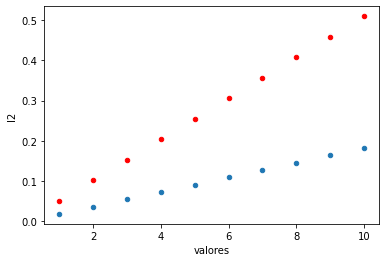

In [48]:
df = pd.Series(range(1, 11), name='valores').to_frame()
df['l1'] = df['valores'].div(df['valores'].abs().sum())
df['l2'] = df['valores'].div(df['valores'].pow(2).sum() ** .5 )
df['l3'] = df['valores'].div(df['valores'].pow(3).sum() ** (1/3) )
ax = df.plot.scatter(x='valores', y='l1')
display(df)
df.plot.scatter(x='valores', y='l2', ax=ax, color='r');

In [49]:
##### Usando a norma l1
vectorizer_l1_norm = TfidfVectorizer(norm="l1")
tf_idf_matrix_l1_norm = vectorizer_l1_norm.fit_transform(preprocessed_corpus)
df = show_tlidf_matrix(tf_idf_matrix_l1_norm, vectorizer_l1_norm)
df.columns = [c + '_l1' for c in df.columns]

##### Adicionando a norma l2
_df = tl_idf_default.copy()
_df.columns = [c + '_l2' for c in _df.columns]
df['---'] = ''
pd.concat([df, _df], axis=1)




The shape of the TF-IDF matrix is:  (3, 11)


,TF-IDF0_l1,TF-IDF1_l1,TF-IDF2_l1,idf_l1,---,TF-IDF0_l2,TF-IDF1_l2,TF-IDF2_l2,idf_l2
language,0.213077,0.185656,0.123771,1.000000,,0.412859,0.478543,0.293607,1.000000
natural,0.213077,0.092828,0.123771,1.000000,,0.412859,0.239271,0.293607,1.000000
process,0.213077,0.092828,0.123771,1.000000,,0.412859,0.239271,0.293607,1.000000
read,0.360770,0.000000,0.000000,1.693147,,0.699030,0.000000,0.000000,1.693147
everyday,0.000000,0.000000,0.209562,1.693147,,0.000000,0.000000,0.497120,1.693147
evolve,0.000000,0.000000,0.209562,1.693147,,0.000000,0.000000,0.497120,1.693147
field,0.000000,0.000000,0.209562,1.693147,,0.000000,0.000000,0.497120,1.693147
comprehend,0.000000,0.157172,0.000000,1.693147,,0.000000,0.405122,0.000000,1.693147
computers,0.000000,0.157172,0.000000,1.693147,,0.000000,0.405122,0.000000,1.693147
data,0.000000,0.157172,0.000000,1.693147,,0.000000,0.405122,0.000000,1.693147


#### N-grams e Max features com TfidfVectorizer

In [50]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features = 6)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(preprocessed_corpus)
show_tlidf_matrix(tf_idf_matrix_n_gram_max_features, vectorizer_n_gram_max_features)


The shape of the TF-IDF matrix is:  (3, 11)


,TF-IDF0,TF-IDF1,TF-IDF2,idf
language,0.408248,0.666667,0.408248,1.0
language process,0.408248,0.333333,0.408248,1.0
natural,0.408248,0.333333,0.408248,1.0
natural language,0.408248,0.333333,0.408248,1.0
natural language process,0.408248,0.333333,0.408248,1.0
process,0.408248,0.333333,0.408248,1.0


In [51]:
# mostrando o resultado do CountVectorizer para comparar
vectorizer_max_features = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 6)
bow_matrix_max_features = vectorizer_max_features.fit_transform(preprocessed_corpus)
show_bow_matrix(bow_matrix_max_features, vectorizer_max_features)

BoW Matrix Shape:  (6, 3)


,n-grams,qtd0,qtd1,qtd2,Total
0,process,1,1,1,3
1,natural language process,1,1,1,3
2,natural language,1,1,1,3
3,natural,1,1,1,3
4,language process,1,1,1,3
5,language,1,2,1,3


### Limitações do vetorizador TF-IDF

**- Pró**
    - Oferece uma melhoria em relação ao `CountVectorizer` ao dimensionar o pesos dos termos que ocorrem com menos frequência.
    - É computacionalmente rápido.
  
**- Contra** 
    -  Baseia-se na análise lexical e não leva em conta coisas como:
       - co-ocorrência de termos
       - semântica
       - contexto associado a termos
       - posição de um termo em um documento 
    - Depende do tamanho do vocabulário <sub>(ficará muito lento com tamanhos de vocabulário grandes)</sub>.

## Similaridade de documentos

### Introdução

Após aprender algumas técnicas de representação, vamos aplicá-las para calcular a distância (similaridade) entre documentos de texto usando **Similaridade por Cosseno**.

>**Premissa:**
>
>Se as **palavras** usadas em dois documentos forem **semelhantes**, isso indica que os **documentos** são **semelhantes** também.

**Como calcular**


$
cos\theta = \dfrac{A \cdot B}{||A|| \space ||B||} = \dfrac{\Sigma_{i=1}^{n} A_i \times B_i}{\sqrt{\Sigma_{i=1}^{n} A_i^2}  \times \sqrt{\Sigma_{i=1}^{n} B_i^2}}
$

- Considerações
  - A e B são vetores de dimensões iguais
  - Se `cos $\theta$ = 1`: documentos A e B são iguais
  - Se `cos $\theta$ = -1`: documentos A e B são totalmente diferentes

### Função para calcular Similaridade por Cosseno

In [52]:
def cosine_similarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * np.sqrt(np.sum(vector2**2)))

### Similaridade por Cosseno usando o CountVectorize

In [53]:
for i in range(bow_matrix.shape[0]):
    for j in range(i + 1, bow_matrix.shape[0]):
        print(f"A similaridade por cosseno entre os documentos {i} e {j} é: " + 
              f'{cosine_similarity(bow_matrix.toarray()[i], bow_matrix.toarray()[j])}')

A similaridade por cosseno entre os documentos 0 e 1 é: 0.6324555320336759
A similaridade por cosseno entre os documentos 0 e 2 é: 0.6123724356957946
A similaridade por cosseno entre os documentos 1 e 2 é: 0.5163977794943223


Os documentos 0 e 1 são os mais similares e os documentos 1 e 2 são os mais diferentes. 

### Similaridade por Cosseno usando o TfIdfVectorizer

In [54]:
for i in range(tf_idf_matrix.shape[0]):
    for j in range(i + 1, tf_idf_matrix.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(tf_idf_matrix.toarray()[i], tf_idf_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.39514115766749125
The cosine similarity between the documents  0 and 2 is:  0.36365455673761865
The cosine similarity between the documents  1 and 2 is:  0.2810071916500233


Os documentos 0 e 1 são os mais similares e os documentos 1 e 2 são os mais diferentes. 

## Vetorização One-Hot

In [55]:
sentence2 = ["We are reading about Natural Language Processing Here"]

In [56]:
corpus2 = pd.Series(sentence2)
corpus2

0    We are reading about Natural Language Processi...
dtype: object

In [57]:
# Preprocessing with Lemmatization here
preprocessed_corpus2 = preprocess(corpus2, keep_list = [], stemming = False, stem_type = None,
                                lemmatization = True, remove_stopwords = True)
preprocessed_corpus2

['read natural language process']

### Construindo o vocabulário

In [58]:
set_of_words = set()
for word in preprocessed_corpus[0].split():
    set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['language', 'read', 'process', 'natural']


### Encontrando a posição de cada palavra no vocabulário

In [59]:
position = {}
for i, token in enumerate(vocab):
    position[token] = i
print(position)

{'language': 0, 'read': 1, 'process': 2, 'natural': 3}


### Instanciando a matriz one-hot

> Note here every row in the matrix corresponds to the One Hot vector for an individual term

In [62]:
one_hot_matrix = np.zeros((len(preprocessed_corpus2[0].split()), len(vocab)))
display(one_hot_matrix)
one_hot_matrix.shape

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

(4, 4)

In [66]:
# representação com DataFrame
pd.DataFrame(one_hot_matrix, columns=position.keys())

,language,read,process,natural
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0


### Preenchendo a Matriz

In [68]:
for i, token in enumerate(preprocessed_corpus2[0].split()):
    one_hot_matrix[i][position[token]] = 1
one_hot_matrix

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

### Minha Versão...

In [73]:
# cria df base com o vocab
df = pd.DataFrame(columns=vocab)
display(df)

# cria matrix one-hot com todas palavras
df_to_concat = pd.get_dummies(preprocessed_corpus2[0].split())

# filtra para ter apenas as colunas 
df_to_concat = df_to_concat[df_to_concat.columns.intersection(df.columns)]
pd.concat([df, df_to_concat])

,language,read,process,natural


,language,read,process,natural
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0


## Chatbot

1. Armazene todas as perguntas do corpus em uma lista
2. Armazene todas as respostas correspondentes do corpus em uma lista
3. Vetorize e pré-processe os dados da pergunta
4. Vetorize e pré-processe a consulta do usuário
5. Avalie a pergunta mais semelhante à consulta do usuário usando a semelhança de cosseno
6. Devolva a resposta correspondente à pergunta mais semelhante como uma resposta de bate-papo

In [75]:
#!pip install scikit-learn
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


# carregando o arquivo de perguntas e respostas de equipamentos eletrônicos da Amazon
# em listas distintas
import ast 
questions = []
answers = [] 
with open('qa_Electronics.json','r') as f:
    for line in f:
        data = ast.literal_eval(line) # function to convert the rows from a string to a Python dictionary
        questions.append(data['question'].lower())
        answers.append(data['answer'].lower())

In [88]:
questions

['is this cover the one that fits the old nook color? which i believe is 8x5.',
 'does it fit nook glowlight?',
 'would it fit nook 1st edition? 4.9in x 7.7in ?',
 "will this fit a nook color that's 5 x 8?",
 'will this fit the samsung galaxy tab 4 nook 10.1',
 'does it have a flip stand?',
 'does this have a flip stand',
 'also fits the hd+?',
 'does it have 2 positions for the reader? horizontal/vertical thank you kwod',
 'is there a closure mechanism? bands, magnetic, etc.?',
 'how far out does the arm extend?',
 'can you mount a sound bar using the external "stick" arms vertically hanging below the lcd monitor (27 inch)?',
 'my tv has a vesa 200x200 bolt pattern and i need it to extend to 24 inches. with the extension, will this wall mount fit my bolt pattern?',
 'my vizio has 200 ht x 600 width mounting holes. will this mount handle that?',
 'will it fit vizio tvs?',
 'does it work well with 39 inch magnavox tv',
 'can i use it on a tv with vesa 100 x 100?',
 'will it mount a 32" 

In [86]:
# Tokeniza perguntas e converte dados para o formato de matriz
# e treina o modelo CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(questions)
X_vec

<314263x69189 sparse matrix of type '<class 'numpy.int64'>'
	with 2033712 stored elements in Compressed Sparse Row format>

In [87]:
# Transforma dados aplicando "term frequency inverse document frequency" (TF-IDF) 
tfidf = TfidfTransformer() # aplica normalização "l2" por defaul
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf

<314263x69189 sparse matrix of type '<class 'numpy.float64'>'
	with 2033712 stored elements in Compressed Sparse Row format>

In [83]:
def conversation(im):
    global tfidf, answers, X_tfidf
    Y_vec = vectorizer.transform(im) # cria a matriz com as  quantidades de cada palavra do dicionário
    Y_tfidf = tfidf.fit_transform(Y_vec) # aplica o TF-IDF na matriz
    cos_sim = np.rad2deg(np.arccos(max(cosine_similarity(Y_tfidf, X_tfidf)[0]))) # calcula o cos e retorna o maior
    if cos_sim > 60 :
        return "sorry, I did not quite understand that"
    else:
        return answers[np.argmax(cosine_similarity(Y_tfidf, X_tfidf)[0])]

def main():
    usr = input("Please enter your username: ")
    print("support: Hi, welcome to Q&A support. How can I help you?")
    while True:
        im = input("{}: ".format(usr))
        print(im)
        if im.lower() == 'bye':
            print("Q&A support: bye!")
            break
        else:
            print("Q&A support: "+conversation([im]))

In [85]:
main()

support: Hi, welcome to Q&A support. How can I help you?
battery life of my phone
Q&A support: so far after i charge the battery it will last about 90 minutes. i have not had any issues with the battery.
?
Q&A support: sorry, I did not quite understand that
Does it have bluetooth
Q&A support: no
theft?
Q&A support: have to see if it covers it.
bye
Q&A support: bye!
